In [59]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

#drive.mount('/content/drive')
csv_path = 'drive/My Drive/data/mtfuji_data.csv' # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

問題1

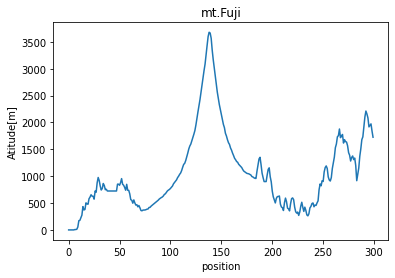

In [60]:
#地点と標高に関する線グラフ
plt.title('mt.Fuji') 
plt.plot(fuji[:,0], fuji[:,3])
plt.xlabel('position') 
plt.ylabel('Atitude[m]') 

plt.show()

問題2

In [61]:
#勾配の関数
def slope_cal(current_p):
  x = (fuji[current_p , 3] - fuji[(current_p - 1) , 3]) / (fuji[current_p , 0] - fuji[(current_p - 1) , 0]) #勾配計算

  return x

current_p_slope = slope_cal(10) #勾配の関数実行(現在の位置は10を指定)
print('現在の位置の勾配は ' + str(current_p_slope))

現在の位置の勾配は 117.15


問題3

In [62]:
print('--------問題3--------')
#移動先の地点計算関数
def next_p_cal(current_p):
  slope = slope_cal(current_p) #勾配関数呼び出し
  next_p = round(current_p - 0.2 * slope) #移動先計算

  return next_p

next_p = next_p_cal(100) #移動先の地点計算関数(現在の位置は100を指定)
print('移動先の位置は ' + str(next_p))

--------問題3--------
移動先の位置は 96


問題4

In [63]:
print('--------問題4--------')
#移動先の地点計算関数（問題4用、勾配を固定）
def next_p_cal_2(current_p,slope, hpram=0.2):
  next_p = round(current_p - hpram * slope) #移動先計算

  return next_p

def downhill_cal(current_p):#下山リスト作成関数
  position_list = [current_p] #ポジションリスト作成
  slope = slope_cal(current_p) #勾配取得
  slope_list = [slope] #勾配リスト作成

  while fuji[current_p,3] != 0:
    next_p = next_p_cal_2(current_p,slope) 
    position_list.append(next_p) #ポジションリストへ追加
    slope_list.append(slope) #勾配りストへ追加

    if next_p >= current_p:
      break #移動先と現在地が移動されていない場合は終了
    else:
      current_p = next_p
  
  return position_list, slope_list

position_list, slope_list = downhill_cal(136) #下山リスト作成関数呼び出し
print(position_list)

--------問題4--------
[136, 102, 68, 34, 0]


問題5

--------問題5--------


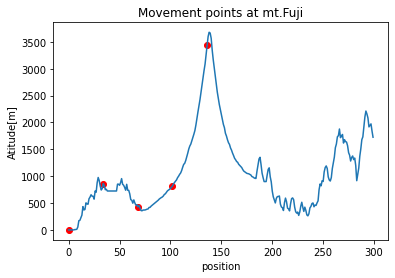

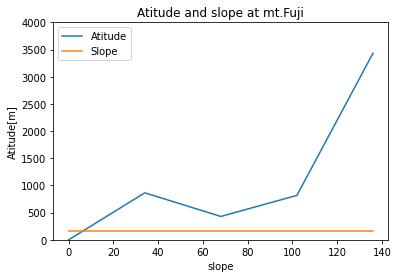

In [64]:
print('--------問題5--------') 
downhill_elev = [] #標高リスト

for i in range(len(position_list)):
  downhill_elev.append(fuji[position_list[i], 3])

#移動ポイントに関するグラフ
plt.title('Movement points at mt.Fuji') 
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(position_list, downhill_elev, c='r')
plt.xlabel('position') 
plt.ylabel('Atitude[m]') 

plt.show()

#移動ポイントと勾配に関するグラフ
plt.title('Atitude and slope at mt.Fuji') 
plt.plot(position_list, downhill_elev, label='Atitude')
plt.plot(position_list, slope_list, label='Slope')
plt.xlabel('slope') 
plt.ylabel('Atitude[m]') 
plt.ylim(0, 4000)
plt.legend()

plt.show()



問題6・7

--------問題6・7--------
----- position 20 -----
[20, 0]


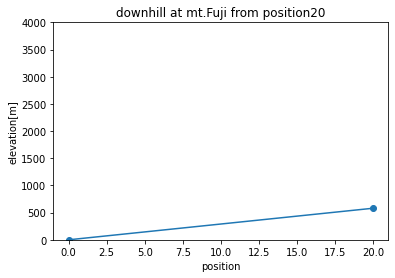

----- position 50 -----
[50, 54]


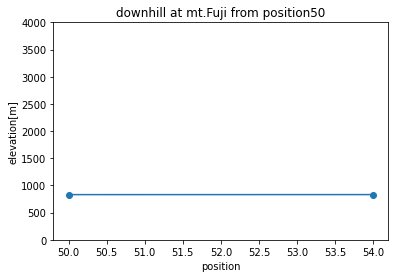

----- position 80 -----
[80, 80]


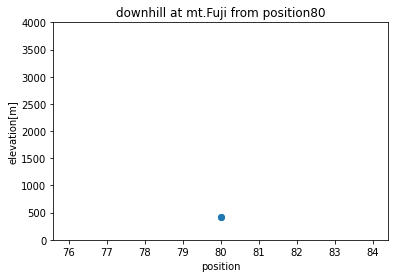

----- position 110 -----
[110, 105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5]


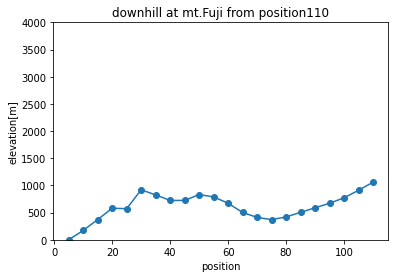

----- position 140 -----
[140, 159]


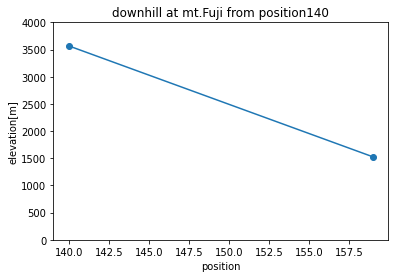

----- position 170 -----
[170, 174]


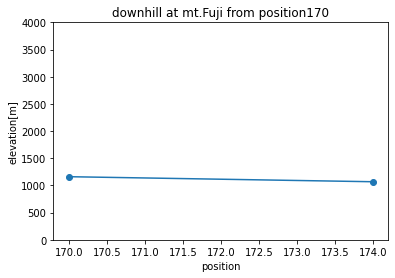

----- position 200 -----
[200, 234]


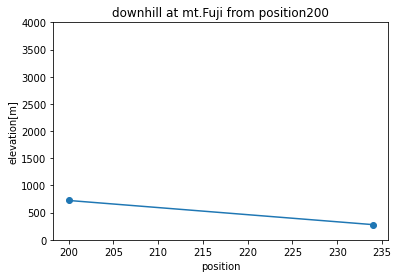

----- position 230 -----
[230, 249]


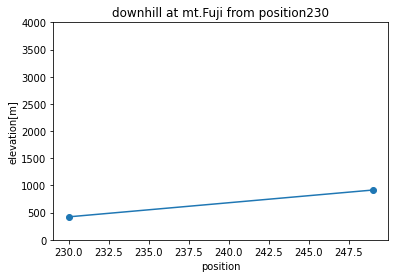

----- position 260 -----
[260, 240, 220, 200, 180, 160, 140, 120, 100, 80, 60, 40, 20, 0]


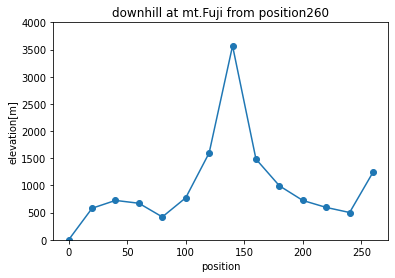

----- position 290 -----
[290, 253, 216, 179, 142, 105, 68, 31, 0]


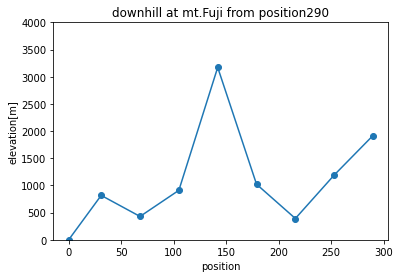

In [65]:
print('--------問題6・7--------') 
def downhill_cal_2():#下山リスト作成関数
  for i in range(20, fuji.shape[0], 30):
    current_p = i

    position_list = []#位置リスト初期化
    position_list = [current_p] #現在地格納
    slope = slope_cal(current_p) #勾配取得

    while fuji[current_p,3] != 0:
      next_p = next_p_cal_2(current_p,slope)

      if(next_p < 0): #next_pが0以下ならnext_pを0にする
        next_p = 0
      if(next_p > 299): #next_pが299以上ならnext_pを299にする
        next_p = 299

      position_list.append(next_p) #リストへ追加
      
      if next_p >= current_p:
        break #移動先と現在地が移動されていない場合は終了
      else:
        current_p = next_p

    print('----- position ' + str(i) + ' -----')  
    print(position_list)#位置リスト出力
        
    downhill_elev = [] #標高リスト作成

    for _ in range(len(position_list)):
      downhill_elev.append(fuji[position_list[_], 3])

    plt.title('downhill at mt.Fuji from position' + str(i)) 
    plt.plot(position_list, downhill_elev, marker="o")
    plt.xlabel('position') 
    plt.ylabel('elevation[m]') 
    plt.ylim(0, 4000)
    
    plt.show()

downhill_cal_2()

問題8

--------問題8--------
----- position 20 -----
[20, 0]


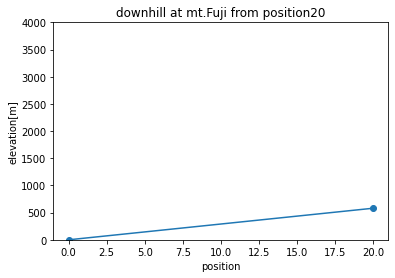

----- position 50 -----
[50, 64]


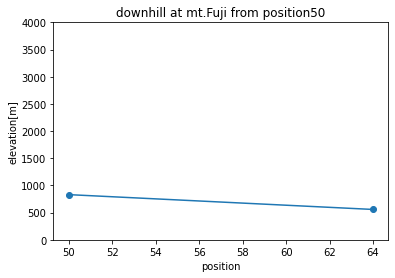

----- position 80 -----
[80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4]


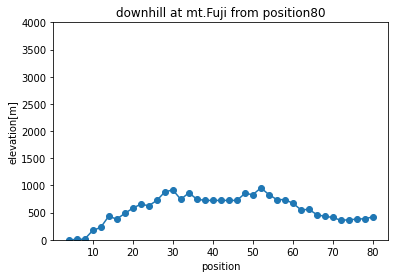

----- position 110 -----
[110, 92, 74, 56, 38, 20, 2]


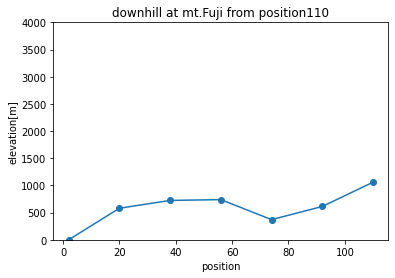

----- position 140 -----
[140, 208]


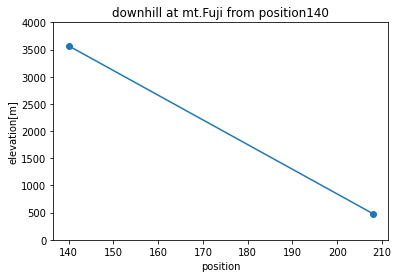

----- position 170 -----
[170, 185]


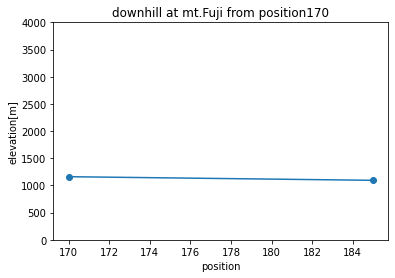

----- position 200 -----
[200, 299]


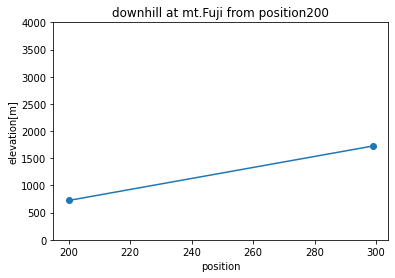

----- position 230 -----
[230, 295]


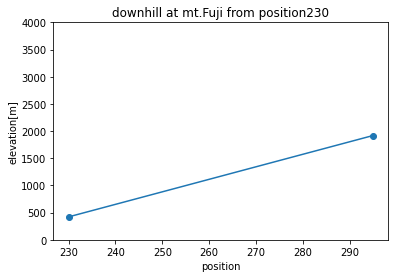

----- position 260 -----
[260, 189, 118, 47, 0]


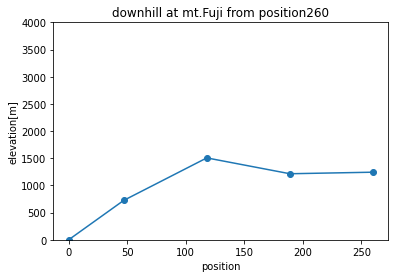

----- position 290 -----
[290, 160, 30, 0]


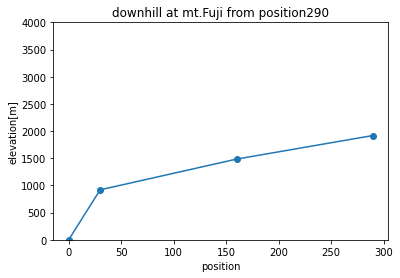

In [66]:
print('--------問題8--------') 
#ハイパーパラメータを0.7に設定
def downhill_cal_2():#下山リスト作成関数
  for i in range(20, fuji.shape[0], 30):
    current_p = i

    position_list = []#位置リスト初期化
    position_list = [current_p] #現在地格納
    slope = slope_cal(current_p) #勾配取得

    while fuji[current_p,3] != 0:
      next_p = next_p_cal_2(current_p,slope, 0.7) #ハイパーパラメータを0.7に設定

      if(next_p < 0): #next_pが0以下ならnext_pを0にする
        next_p = 0
      if(next_p > 299): #next_pが299以上ならnext_pを299にする
        next_p = 299

      position_list.append(next_p) #リストへ追加
      
      if next_p >= current_p:
        break #移動先と現在地が移動されていない場合は終了
      else:
        current_p = next_p

    print('----- position ' + str(i) + ' -----')  
    print(position_list)#位置リスト出力
        
    downhill_elev = [] #標高リスト作成

    for _ in range(len(position_list)):
      downhill_elev.append(fuji[position_list[_], 3])

    plt.title('downhill at mt.Fuji from position' + str(i)) 
    plt.plot(position_list, downhill_elev, marker="o")
    plt.xlabel('position') 
    plt.ylabel('elevation[m]') 
    plt.ylim(0, 4000)
    
    plt.show()

downhill_cal_2()